### Top 7 Industries - Out Migrators w/ No Family Income
\*PERWT *is* applied here (since the data does not address economic variables, such as income or rent)

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [5]:
#Removing rows with NA's
outmigrators = outmigrators[outmigrators.IND_CAT.str.contains('N/A') == False]

Abbreviating the description of some top 7 industries:

In [6]:
outmigrators = outmigrators.replace({'Accommodation and Food Services':'Accom. & Food Services', 
                     'Professional, Scientific, and Technical Services':'Scientific & Tech Services', 
                     'Health Care and Social Assistance':'Health Care'})

In [7]:
outmigrators.IND_CAT.value_counts()[:7]

Retail Trade                  3021
Health Care                   2434
Educational Services          2423
Scientific & Tech Services    2226
Accom. & Food Services        2218
Manufacturing                 1985
Construction                  1498
Name: IND_CAT, dtype: int64

#### Filtered Data:

In [8]:
#Removing records with missing rent or mortgage values (assigned the value 0)
#Removing records with missing individual and/or family income values (assigned the value 9999999)
#Only keeping records of individuals who do not have family incomes
out_rent_inc = outmigrators[(outmigrators.RENT != 0) & 
                            (outmigrators.INCTOT != 9999999) & 
                            (outmigrators.FTOTINC != 9999999) & 
                            (outmigrators.INCTOT >= outmigrators.FTOTINC)]

In [9]:
len(out_rent_inc)

6310

In [10]:
out_rent_inc.IND_CAT.value_counts()[:9]

Scientific & Tech Services                                  745
Retail Trade                                                724
Educational Services                                        636
Health Care                                                 604
Accom. & Food Services                                      577
Manufacturing                                               473
Finance and Insurance                                       307
Administrative and support and waste management services    307
Construction                                                298
Name: IND_CAT, dtype: int64

*Note: Construction now is the 9th most common industry after filtering

---

In [11]:
#Extracting only the top 7 industries from the unfiltered data, to include construction values
top7_orig = list(out_rent_inc.IND_CAT.value_counts()[:9].index)
top7_orig.pop(6)
top7_orig.pop(6)

'Administrative and support and waste management services'

In [12]:
top7_orig

['Scientific & Tech Services',
 'Retail Trade',
 'Educational Services',
 'Health Care',
 'Accom. & Food Services',
 'Manufacturing',
 'Construction']

In [13]:
#Calculating annual out migration counts for top 7 industries
ind = pd.DataFrame()

for year in range(2006,2018):    
    df = out_rent_inc[out_rent_inc.YEAR == year]
    counts = {}
    for industry in top7_orig:
        count = df.PERWT[df.IND_CAT == industry].sum()
        counts[industry] = count
        
    ind_df = pd.DataFrame.from_dict(counts, orient='index')
    ind_df = ind_df.reset_index().rename({'index':'Industry', 0:'Count'}, axis=1)
    ind_df['Year'] = np.full(len(ind_df), year)
    
    ind = pd.concat([ind, ind_df])

In [14]:
ind.head(10)

,Industry,Count,Year
0,Scientific & Tech Services,8084,2006
1,Retail Trade,10748,2006
2,Educational Services,4772,2006
3,Health Care,5748,2006
4,Accom. & Food Services,9170,2006
5,Manufacturing,7600,2006
6,Construction,7317,2006
0,Scientific & Tech Services,7088,2007
1,Retail Trade,9031,2007
2,Educational Services,3679,2007


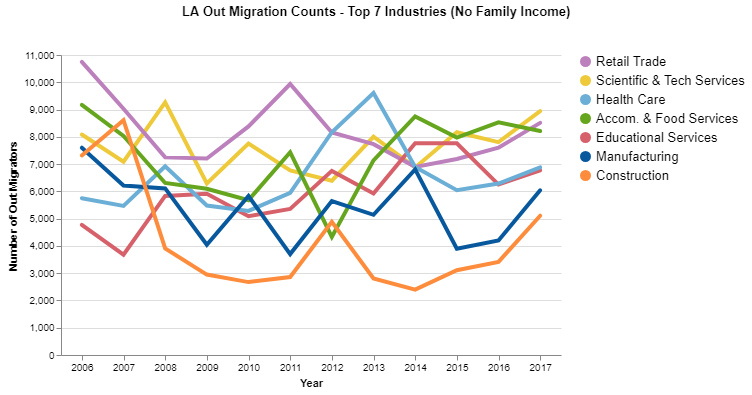

In [15]:
#Plotting top 7 via Altair
title=alt.TitleParams(text='LA Out Migration Counts - Top 7 Industries (No Family Income)', offset=30, anchor='middle')

top7 = alt.Chart(ind).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(grid=False)), 
    y=alt.Y('Count', 
            title='Number of Out Migrators'), 
    color=alt.Color('Industry', 
                    title=None,
                    scale=alt.Scale(range=['#bc80bd', '#eeca3b', '#6baed6', '#66a61e', '#d6616b', '#08589e', '#fd8d3d'], 
                                    domain=['Retail Trade', 'Scientific & Tech Services', 'Health Care', 'Accom. & Food Services', 
                                            'Educational Services', 'Manufacturing', 'Construction']),
)).properties(width=500, 
              title=title,
              background='white'
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).configure_view(strokeWidth=0)

top7

In [16]:
top7.save('top7_ind_out_no_fam.png', scale_factor=3)